# Regresión

Autores:
Ivan Toribio
Héctor Sancho
Jordi Hamberg

# Enunciado

En esta práctica, se os proporcionará un conjunto de datos con características de automóviles de segunda mano en distintos países. El objetivo es preprocesar los datos y construir un modelo capaz de predecir los precios de coches que nunca haya visto.

Además, se llevará a cabo una **competición** en kaggle, podéis inscribiros en este siguiente [enlace](https://www.kaggle.com/t/95194d38b1f9447fa9e3b51b8e9d575f)




La estructura del proyecto debe ser la siguiente:

- Carga y limpieza de los datos
- Visualización
- Preprocesamiento
- Pruebas de modelos (razonar sobre los resultados)
- Conclusiones
- Creación de submission



Se valorarán:

- Número y variedad de experimentos con sus conclusiones.
- Calidad del preprocesamiento (y su razonamiento).
- Capacidad de generalización del modelo final.
- Trabajo en equipo (en grupos de más de 1 integrante, claro).
- Creatividad en la solución.
- Claridad del .ipynb presentado en Moodle

# Carga y limpieza de los datos


Aunque se permite la carga de los datos de forma local, se recomienda emplear las siguientes URLs de gist por comodidad:

In [1]:
import numpy as np

In [2]:
train_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/training.csv"
test_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/test.csv"

In [3]:
import pandas as pd

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [4]:
import matplotlib.pyplot as plt

# Visualización

In [5]:
train_df

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Chevrolet Spark 1.0 LT,2011,130000,68519,Petrol,Dealer,Manual,First Owner,16.2 kmpl,995 CC,62.1 bhp,90.3Nm@ 4200rpm,5.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,1050000,70000,Diesel,Dealer,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
2,3,Mahindra Scorpio S10 7 Seater,2016,1100000,60000,Diesel,Individual,Manual,First Owner,15.4 kmpl,2179 CC,120 bhp,280Nm@ 1800-2800rpm,7.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,350000,10000,Petrol,Individual,Manual,Second Owner,20.3 kmpl,998 CC,68.05 bhp,94.14Nm@ 3500rpm,5.0
4,5,Maruti Swift Dzire VDI,2014,490000,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,6905,Hyundai i20 2015-2017 Asta Option 1.2,2016,650000,29000,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
6905,6906,Hyundai EON Sportz,2017,300000,10000,Petrol,Individual,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
6906,6907,Maruti Swift VDI Optional,2017,693000,58559,Diesel,Dealer,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6907,6908,Maruti Baleno Alpha 1.2,2017,580000,20000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0


Vamos a utilizar la funcion crear_pol para convertir series en dataframes de varias columnas con las versiones elevadas a distintos exponentes de los datos para poder hacer una regresion polinomica. Ahora ponemos un ejemplo von years

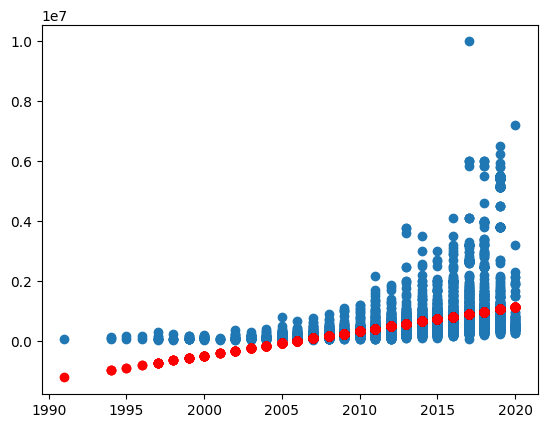

In [6]:
df_ejemplo = train_df.loc[:,["selling_price", "year"]]


from sklearn.linear_model import LinearRegression
reg = LinearRegression()

X = df_ejemplo["year"].values.reshape(-1,1)
y = df_ejemplo["selling_price"]

reg.fit(X, y)
y_pred = reg.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_pred, color = "red")

In [7]:
DEGREE = 3

In [8]:
def crear_pol(columna : pd.Series, column_name : str):

    if DEGREE == 1:
        return pd.DataFrame({column_name + "_1": columna})

    columna = columna.replace(np.nan, 0)

    matriz_valores = columna.values.reshape(-1, 1)

    from sklearn.preprocessing import PolynomialFeatures
    pol = PolynomialFeatures(DEGREE)

    matriz = pol.fit_transform(matriz_valores)

    df_temp = pd.DataFrame()

    for i, columna in enumerate(matriz.transpose()):
        df_temp[f"{column_name}_{i}"] = columna

    df_temp = df_temp.replace(0, np.nan)

    return df_temp

para algunos años predice valores negativos y en general vemos que una recta no va a ser una buena aproximacion para los datos, probamos con crear pol

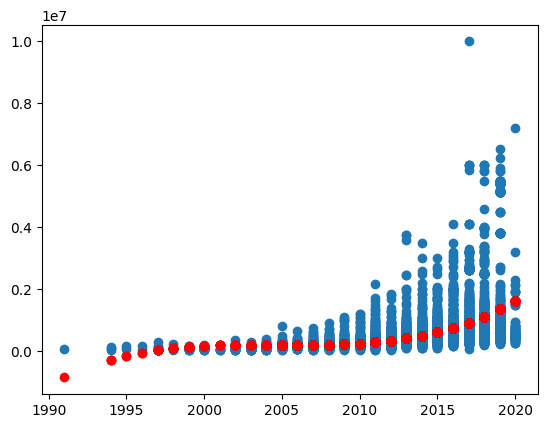

In [9]:
df_pol = pd.concat([train_df["selling_price"], crear_pol(df_ejemplo["year"], "year")], axis=1)

X = df_pol.drop("selling_price", axis=1).values
y = df_pol["selling_price"]

reg.fit(X, y)
y_pred = reg.predict(X)

plt.scatter(df_pol["year_1"], y)
plt.scatter(df_pol["year_1"], y_pred, color = "red")

Esto funciona mejor pero como veremos hay mejores regresores que el linearRegressor normal, a los que no es necesario psarle los datos con los diferente grados para que no aproxime con una linea recta

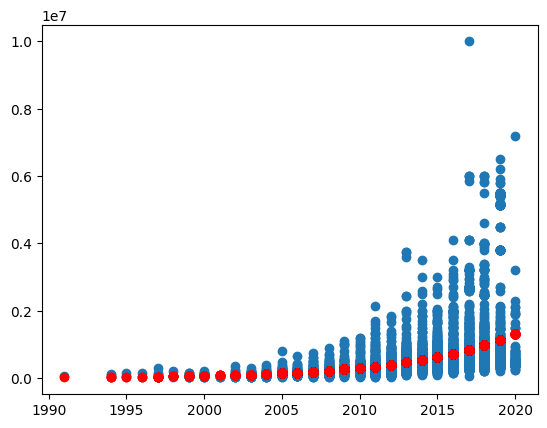

In [10]:
from sklearn.linear_model import GammaRegressor
reg = GammaRegressor()

DEGREE = 1

X = df_ejemplo["year"].values.reshape(-1,1)
y = df_ejemplo["selling_price"]

reg.fit(X, y)
y_pred = reg.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_pred, color = "red")

# Preprocesamiento

In [11]:
DEGREE = 1

In [12]:
processed_df = pd.DataFrame()

In [13]:
#nombre
processed_df["name"] = train_df["name"]

In [14]:
#precio
processed_df["selling_price"] = train_df["selling_price"]

In [15]:
#year
processed_df = pd.concat([processed_df, crear_pol(train_df["year"], "year")], axis=1)

In [16]:
#km_driven
processed_df = pd.concat([processed_df, crear_pol(train_df["km_driven"], "km_driven")], axis=1)

In [17]:
def splitter(x):
    if type(x) == str:
        return float(x.split(" ")[0])
    return x

In [18]:
import re

def splitter_re(x):
    if type(x) == str:
        try:
            return re.findall(r"[0-9.]+", x)[0]
        except Exception:
            return np.nan
    else:
        return x

In [19]:
#mileage

serie = train_df["mileage"]
serie = serie.apply(splitter)

processed_df = pd.concat([processed_df, crear_pol(serie, "mileage")], axis=1)



In [20]:
#engine


serie = train_df["engine"]
serie = serie.apply(splitter)

processed_df = pd.concat([processed_df, crear_pol(serie, "engine")], axis=1)

In [21]:
#max_power

serie = train_df["max_power"]
serie = serie.apply(splitter_re)

processed_df = pd.concat([processed_df, crear_pol(serie, "max_power")], axis=1)

In [22]:
#seats

serie = train_df["seats"]

processed_df = pd.concat([processed_df, crear_pol(serie, "seats")], axis=1)

In [23]:
categoricas = ["fuel", "seller_type", "transmission", "owner"]

diccionarios = {}

Para tratar las variables discretas nos salimos un poco del encoder normal. Para dar un sentido de orden agrupamos los datos en en funcion de la variabe discreta y asignaremos a estas variables, el precio medio de coches con esa caracteristica. Al hacer lo mismo con la primera palabra del nombre de los coches tenemos un valor para las marcas, que tiene sentido añadir al modelo ya que hay marcas que por lo generar son mas caras que el resto.

In [24]:
df_aux = pd.DataFrame({

    "selling_price":train_df["selling_price"],
    "brand": train_df["name"].map(lambda x: x.split()[0])

})

pesos = df_aux.groupby("brand").mean().reset_index()
pesos = pesos.rename(columns={"selling_price": "peso"})

df_aux.drop(columns=["selling_price"], inplace=True)

diccionario = {categorica : peso for categorica, peso in pesos.values}

diccionarios["brand"] = diccionario

df_aux = df_aux.map(lambda x: diccionario[x])

processed_df = pd.concat([processed_df, crear_pol(df_aux["brand"], "brand")], axis=1)

In [25]:
for categorica in categoricas:

    df_aux = train_df.loc[:,[categorica, "selling_price"]]

    pesos = df_aux.groupby(categorica).mean().reset_index()
    pesos = pesos.rename(columns={"selling_price": "peso"})

    df_aux.drop(columns=["selling_price"], inplace=True)

    diccionario = {categorica : peso for categorica, peso in pesos.values}

    diccionarios[categorica] = diccionario

    df_aux = df_aux.map(lambda x: diccionario[x])

    processed_df = pd.concat([processed_df, crear_pol(df_aux[categorica], categorica)], axis=1)

# Pruebas de modelos

In [26]:
#metricas

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error as mse


def metricas(y_pred, y):
    
    print (mae(y, y_pred))
    print (evs(y, y_pred))

In [27]:
#Tratar Nan

#Sustituimos por la media de la columna

from copy import deepcopy


def procesar_nan(df : pd.DataFrame):

    df_copy = df.copy()

    for columna in df_copy.columns:
        media = df_copy[columna].mean()
        df_copy[columna] = df_copy[columna].fillna(media)

    return df_copy
        

Train test split

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(processed_df, test_size=0.2, random_state=16)




X_train = train.drop(["name", "selling_price"], axis=1)
X_train = X_train.astype("float64")
y_train = train["selling_price"]

X_test = test.drop(["name", "selling_price"], axis=1)
X_test = X_test.astype("float64")
y_test = test["selling_price"]

Regresion lineal

Nota: La puntuacion en grado 2 mejora hasta 160437, pero lo dejaremos en grado 1 para que no interfiera con el resto de pruebas

In [29]:
df_aux = pd.concat([X_train, y_train], axis=1)

df_aux.dropna(axis=0, inplace=True)

X_train = df_aux.drop("selling_price", axis=1)
y_train = df_aux["selling_price"]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
metricas(reg.predict(procesar_nan(X_test)), y_test)

179569.16245879116
0.844341061931686


In [30]:
df_aux = pd.concat([X_train, y_train], axis=1)

df_aux.dropna(axis=0, inplace=True)

X_train = df_aux.drop("selling_price", axis=1)
y_train = df_aux["selling_price"]

from sklearn.linear_model import GammaRegressor

reg = GammaRegressor(max_iter=9999)
reg.fit(X_train, y_train)
metricas(reg.predict(procesar_nan(X_test)), y_test)


242031.06826811167
-1.3737866603077062


In [31]:
df_aux = pd.concat([X_train, y_train], axis=1)

df_aux.dropna(axis=0, inplace=True)

X_train = df_aux.drop("selling_price", axis=1)
y_train = df_aux["selling_price"]

from sklearn.linear_model import TweedieRegressor

reg = TweedieRegressor(max_iter=9999)
reg.fit(X_train, y_train)
metricas(reg.predict(procesar_nan(X_test)), y_test)

196102.60477451218
0.8295632394131919


In [32]:
df_aux = pd.concat([X_train, y_train], axis=1)

df_aux.dropna(axis=0, inplace=True)

X_train = df_aux.drop("selling_price", axis=1)
y_train = df_aux["selling_price"]

from sklearn.linear_model import QuantileRegressor

reg = QuantileRegressor()
reg.fit(X_train, y_train)
metricas(reg.predict(procesar_nan(X_test)), y_test)

196363.64865582544
0.8223187179129101


In [33]:
df_aux = pd.concat([X_train, y_train], axis=1)

df_aux.dropna(axis=0, inplace=True)

X_train = df_aux.drop("selling_price", axis=1)
y_train = df_aux["selling_price"]

from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
metricas(reg.predict(procesar_nan(X_test)), y_test)

90528.27167825183
0.9659740703136602


In [34]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor()
reg.fit(X_train, y_train)
metricas(reg.predict(X_test), y_test)

76058.36256739704
0.9700157098912171


In [35]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor(random_state=16)
reg.fit(X_train, y_train)
metricas(reg.predict(X_test), y_test)

78289.17086673508
0.9401256421526638


In [36]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
metricas(reg.predict(X_test), y_test)

73936.76242928597
0.9546567751318892


In [37]:
df_aux = pd.concat([X_train, y_train], axis=1)

df_aux.dropna(axis=0, inplace=True)

X_train = df_aux.drop("selling_price", axis=1)
y_train = df_aux["selling_price"]

from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(X_train, y_train)
metricas(reg.predict(procesar_nan(X_test)), y_test)

71882.1822464555
0.9617860468894152


In [38]:
processed_df

,name,selling_price,year_1,km_driven_1,mileage_1,engine_1,max_power_1,seats_1,brand_1,fuel_1,seller_type_1,transmission_1,owner_1
0,Chevrolet Spark 1.0 LT,130000,2011,68519,16.20,995.0,62.1,5.0,269997.621891,459605.076059,1.415780e+06,453091.397115,771708.327317
1,Hyundai Verna 1.6 SX CRDi (O),1050000,2017,70000,22.32,1582.0,126.32,5.0,454804.856073,778718.659924,1.415780e+06,453091.397115,771708.327317
2,Mahindra Scorpio S10 7 Seater,1100000,2016,60000,15.40,2179.0,120,7.0,618376.889231,778718.659924,4.920603e+05,453091.397115,771708.327317
3,Hyundai EON 1.0 Kappa Magna Plus Optional,350000,2018,10000,20.30,998.0,68.05,5.0,454804.856073,459605.076059,4.920603e+05,453091.397115,385728.259053
4,Maruti Swift Dzire VDI,490000,2014,50000,23.40,1248.0,74,5.0,405203.436681,778718.659924,4.920603e+05,453091.397115,771708.327317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,Hyundai i20 2015-2017 Asta Option 1.2,650000,2016,29000,18.60,1197.0,81.83,5.0,454804.856073,459605.076059,4.920603e+05,453091.397115,771708.327317
6905,Hyundai EON Sportz,300000,2017,10000,21.10,814.0,55.2,5.0,454804.856073,459605.076059,4.920603e+05,453091.397115,771708.327317
6906,Maruti Swift VDI Optional,693000,2017,58559,25.20,1248.0,74,5.0,405203.436681,778718.659924,1.415780e+06,453091.397115,771708.327317
6907,Maruti Baleno Alpha 1.2,580000,2017,20000,21.40,1197.0,83.1,5.0,405203.436681,459605.076059,4.920603e+05,453091.397115,771708.327317


# Conclusiones

Finalmente nos quedamos con el modelo de Extratrees.

# Creación de *submission* para Kaggle

In [39]:
#procesado dataset

processed_sub_df = pd.DataFrame()

#nombre
processed_sub_df["name"] = test_df["name"]

#year
processed_sub_df = pd.concat([processed_sub_df, crear_pol(test_df["year"], "year")], axis=1)

#km_driven
processed_sub_df = pd.concat([processed_sub_df, crear_pol(test_df["km_driven"], "km_driven")], axis=1)

#mileage

serie = test_df["mileage"]
serie = serie.apply(splitter)

processed_sub_df = pd.concat([processed_sub_df, crear_pol(serie, "mileage")], axis=1)

#engine


serie = test_df["engine"]
serie = serie.apply(splitter)

processed_sub_df = pd.concat([processed_sub_df, crear_pol(serie, "engine")], axis=1)

#max_power

serie = test_df["max_power"]
serie = serie.apply(splitter_re)

processed_sub_df = pd.concat([processed_sub_df, crear_pol(serie, "max_power")], axis=1)

#seats

serie = test_df["seats"]

processed_sub_df = pd.concat([processed_sub_df, crear_pol(serie, "seats")], axis=1)

#Categoricas

serie_marcas = test_df["name"].apply(lambda x: x.split(" ")[0])
serie_marcas = serie_marcas.map(lambda x: diccionarios["brand"][x])
processed_sub_df = pd.concat([processed_sub_df, crear_pol(serie_marcas, "brand")], axis=1)



categoricas = ["fuel", "seller_type", "transmission", "owner"]

for categorica in categoricas:
    serie = test_df[categorica].map(lambda x: diccionarios[categorica][x])
    processed_sub_df = pd.concat([processed_sub_df, crear_pol(serie, categorica)], axis=1)


print(processed_sub_df.columns)
print(processed_df.columns)

Index(['name', 'year_1', 'km_driven_1', 'mileage_1', 'engine_1', 'max_power_1',
       'seats_1', 'brand_1', 'fuel_1', 'seller_type_1', 'transmission_1',
       'owner_1'],
      dtype='object')
Index(['name', 'selling_price', 'year_1', 'km_driven_1', 'mileage_1',
       'engine_1', 'max_power_1', 'seats_1', 'brand_1', 'fuel_1',
       'seller_type_1', 'transmission_1', 'owner_1'],
      dtype='object')


In [40]:
#En caso de que el modelo no acepte nan

X_sub = processed_sub_df.drop("name", axis=1)
X_sub = X_sub.astype("float")

prediccion = reg.predict(procesar_nan(X_sub))
prediccion

array([ 130000.        , 1050000.        , 1100000.        ,
        350000.        ,  600000.        ,  180000.        ,
        189500.        ,  270000.        ,  525000.        ,
        192800.        , 1200000.        ,  250000.        ,
        467000.        ,  432124.97      , 5150000.        ,
        260000.        ,  620000.        ,  354779.99      ,
        525000.        ,  425499.5       ,  448414.92      ,
        380000.        ,  164340.        , 1049000.        ,
        525000.        ,  850000.        ,  198550.        ,
        570000.        ,  175000.        ,  303400.        ,
        656616.65666667,  500000.        , 5150000.        ,
        840000.        ,  582649.99      , 2677347.82608696,
        252000.        ,  120000.        ,  850000.        ,
        184850.        ,  187500.        ,  539500.        ,
        350000.        ,  370000.        ,  700000.        ,
        150000.        ,  300000.        ,  385000.        ,
        200000.        ,

In [41]:
from csv import writer

with open("resultados.csv", "w") as file:
    escritor = writer(file, lineterminator="\n")

    escritor.writerow(["id", "TARGET"])

    for i, dato in enumerate(prediccion):
        escritor.writerow([i + 1,dato])

In [42]:
#En caso de que el modelo acepte nan

X_sub = processed_sub_df.drop("name", axis=1)
X_sub = X_sub.astype("float")

prediccion = reg.predict(X_sub)
prediccion

ValueError: Input X contains NaN.
ExtraTreesRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values